In [16]:
# Try to calculate steady state for basic LW problem 
# Set U(X)=Cln(x); u(q)=ln(q+b)-ln(b); c(q)=q; b=.0001 (Zhang 2014)
# So u'=1/q+b; c'=1; z(q)=(1-theta)u(q)+theta*c(q); z'=(1-theta)/(q+b)+theta;
# l=theta*(u'(q)-c'(q))/z'(q)
# l=theta*[(1-q-b)/(q+b)]/[(1-theta)/(q+b)+theta];
# l=theta*(1-q-b)/(1-theta+(q+b)*theta)=theta*(1-q-b)/(1-theta*(1-q-b))
import math
from scipy import optimize
import numpy as np
b=.00001
B=.95 # Discount rate beta
lam=.75 # Meeting rate lambda
M=1 # Initial Money supply
theta=.65 # Buyer bargaining power
gamma=0.02 # Inflation rate

# Want to solve for q such that lam*l=i=(1+gamma)/B-1
def fun(q):
    return lam*theta*(1-q-b)/(1-theta*(1-q-b))-(1+gamma)/B+1
qstar=np.min(optimize.root(fun,0),0)
print(qstar.x)

[ 0.86236405]


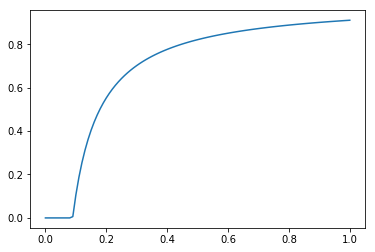

In [21]:
# How does qstar change with theta?
import math
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

b=.00001
B=.95 # Discount rate beta
lam=.75 # Meeting rate lambda
M=1 # Initial Money supply
gamma=0.02 # Inflation rate
tgs=101
thetagrid=np.linspace(0,1,tgs)
qgrid=[]
for theta in thetagrid:
    def fun(q):
        return lam*theta*(1-q-b)/(1-theta*(1-q-b))-(1+gamma)/B+1
    qgrid.append(np.maximum(optimize.root(fun,0).x,0))
    
    
plt.plot(thetagrid,qgrid)
plt.show()

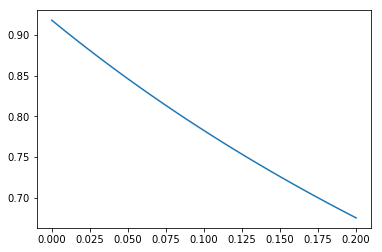

In [19]:
# How does qstar change with gamma?
import math
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

b=.00001
B=.95 # Discount rate beta
lam=.75 # Meeting rate lambda
M=1 # Initial Money supply
theta=.8 # Buyer bargaining power

tgs=101
gammagrid=np.linspace(0,.2,tgs)
qgrid=[]
for gamma in gammagrid:
    def fun(q):
        return lam*theta*(1-q-b)/(1-theta*(1-q-b))-(1+gamma)/B+1
    qgrid.append(np.maximum(optimize.root(fun,0).x,0))
    
    
plt.plot(gammagrid,qgrid)
plt.show()

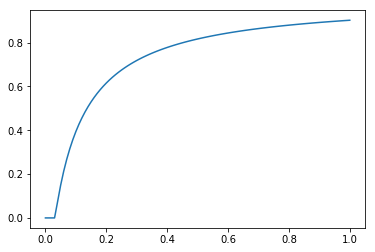

In [18]:
# How does qstar change with lam?
import math
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

b=.00001
B=.95 # Discount rate beta
M=1 # Initial Money supply
theta=.7 # Buyer bargaining power
gamma=.02 # Inflation rate

tgs=101
lamgrid=np.linspace(0,1,tgs)
qgrid=[]
for lam in lamgrid:
    def fun(q):
        return lam*theta*(1-q-b)/(1-theta*(1-q-b))-(1+gamma)/B+1
    qgrid.append(np.maximum(optimize.root(fun,0).x,0))
    
    
plt.plot(lamgrid,qgrid)
plt.show()